# Preprocessing the Sónar timetables

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
import sys
from pathlib import Path

# Adding the project root for module imports
project_root = Path().resolve().parents[1]
sys.path.append(str(project_root))

from attendee_profiling import config

Assigning the path to read files:   

In [23]:
DATASETS_PATH = config.DATASETS_PATH
INPUT_PATH = config.INPUT_PATH
PROCESSED_PATH = config.PROCESSED_PATH

## Data preparation and preliminary steps

In [24]:
# Reading and visualizing the file
sonar_timetables = pd.read_excel(os.path.join(INPUT_PATH, 'sonar2024_timetable_corrected.xlsx'))
sonar_timetables

,sonar_type,day_label,date_start,hour_start,date_end,hour_end,title,activity,music_type,stage,genre,views_youtube
0,Sónar by Day,Thursday 13 June,2024-06-13,15:00:00,2024-06-13,16:00:00,Rumbler,Music,DJ,SonarVillage,NaN,NaN
1,Sónar by Day,Thursday 13 June,2024-06-13,16:05:00,2024-06-13,16:50:00,Huda,Music,LIVE,SonarVillage,NaN,NaN
2,Sónar by Day,Thursday 13 June,2024-06-13,17:00:00,2024-06-13,18:10:00,Olof Dreijer & Diva Cruz (DJ + Percussion set),Music,LIVE,SonarVillage,NaN,NaN
3,Sónar by Day,Thursday 13 June,2024-06-13,18:20:00,2024-06-13,19:00:00,Toya Delazy,Music,LIVE,SonarVillage,NaN,NaN
4,Sónar by Day,Thursday 13 June,2024-06-13,19:05:00,2024-06-13,20:30:00,Surusinghe,Music,DJ,SonarVillage,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
141,Sónar by Night,Saturday 15 June,2024-06-16,01:05:00,2024-06-16,01:55:00,Club Cringe,Music,A/V,SonarCar,Experimental,55831.0
142,Sónar by Night,Saturday 15 June,2024-06-16,02:05:00,2024-06-16,02:55:00,Julietta Ferrari,Music,DJ,SonarCar,Experimental,0.0
143,Sónar by Night,Saturday 15 June,2024-06-16,03:05:00,2024-06-16,03:55:00,Soto Asa,Music,LIVE,SonarCar,Reggaeton,153053094.0
144,Sónar by Night,Saturday 15 June,2024-06-16,04:00:00,2024-06-16,04:50:00,Drazzit,Music,DJ,SonarCar,Trance/Techno,22948.0


Concatenating 'date_start' with 'hour_start' and 'date_end' with 'hour_end' to obtain more operational values (as datetime)

In [17]:
sonar_timetables['start_datetime'] = pd.to_datetime(sonar_timetables['date_start'].astype(str) + ' ' 
                                                    + sonar_timetables['hour_start'].astype(str))
sonar_timetables['end_datetime'] = pd.to_datetime(sonar_timetables['date_end'].astype(str) + ' ' 
                                                  + sonar_timetables['hour_end'].astype(str))

# Organizing the dataframe that I am going to work with and printing the resulting types
sonar_timetables = sonar_timetables[['sonar_type', 'day_label', 'start_datetime', 'end_datetime', 'title', 'activity', 'stage','music_type','genre','views_youtube']]
sonar_timetables.dtypes

sonar_type                object
day_label                 object
start_datetime    datetime64[ns]
end_datetime      datetime64[ns]
title                     object
activity                  object
stage                     object
music_type                object
genre                     object
views_youtube            float64
dtype: object

For the music_type column, there are very few "A/V" events in the timetable, so they will be converted into one of the other two categories: "LIVE" or "DJ", if possible.

In [18]:
print('Number of music events by type (previous to the modification):')
print(sonar_timetables.groupby('sonar_type')['music_type'].value_counts().reset_index(name='count'))

# All of the A/V corresponded to DJs after a manual check
music_type_modification = {'Folamour':'DJ',
                           'Skin on skin':'DJ',
                           'Kaytranada':'DJ',
                           'Club Cringe':'DJ',
                           'BLEX: Filip Custic, Virgen Maria, Naive Supreme & Hundred Tauro':'DJ'}

sonar_timetables['music_type'] = sonar_timetables['title'].map(music_type_modification).fillna(sonar_timetables['music_type'])

print('Number of music events by type (after the modification):')
print(sonar_timetables.groupby('sonar_type')['music_type'].value_counts().reset_index(name='count'))

Number of music events by type (previous to the modification):
       sonar_type music_type  count
0    Sónar by Day       LIVE     40
1    Sónar by Day         DJ     21
2    Sónar by Day        A/V      2
3  Sónar by Night         DJ     28
4  Sónar by Night       LIVE     19
5  Sónar by Night        A/V      3
Number of music events by type (after the modification):
       sonar_type music_type  count
0    Sónar by Day       LIVE     40
1    Sónar by Day         DJ     23
2  Sónar by Night         DJ     31
3  Sónar by Night       LIVE     19


C:\Users\camal\AppData\Local\Temp\ipykernel_32172\2170331461.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonar_timetables['music_type'] = sonar_timetables['title'].map(music_type_modification).fillna(sonar_timetables['music_type'])


###  Grouping genres into more balanced categories

In [19]:
# Number of artist by genre
print(sonar_timetables.groupby('sonar_type')['genre'].value_counts().reset_index(name='count'))

        sonar_type                        genre  count
0   Sónar by Night                        House     12
1   Sónar by Night                       Techno     10
2   Sónar by Night                 Experimental      9
3   Sónar by Night           General electronic      4
4   Sónar by Night                      Hip Hop      2
5   Sónar by Night                          Pop      2
6   Sónar by Night                    Reggaeton      2
7   Sónar by Night                Trance/Techno      2
8   Sónar by Night                    Breakbeat      1
9   Sónar by Night     Dancehall/Jungle/Hip Hop      1
10  Sónar by Night                Drum and bass      1
11  Sónar by Night  Eurodance/Trance/Hard House      1
12  Sónar by Night        Techno/Breakbeat/Acid      1
13  Sónar by Night          Techno/Experimental      1
14  Sónar by Night                       Trance      1


In [14]:
genre_mapping = {
    # Electronic (Accessible)
    "House": "electronic_accessible",
    "General electronic": "electronic_accessible",
    "Eurodance/Trance/Hard House": "electronic_accessible",
    

    # Electronic (Hypnotic)
    "Techno": "electronic_hypnotic",
    "Trance": "electronic_hypnotic",
    "Trance/Techno": "electronic_hypnotic",
    "Techno/Breakbeat/Acid": "electronic_hypnotic",
    "Techno/Experimental": "electronic_hypnotic",
    "Drum and bass": "electronic_hypnotic",
    "Dancehall/Jungle/Hip Hop": "electronic_hypnotic",
    "Breakbeat": "electronic_hypnotic",
    "Experimental": "electronic_hypnotic",

    # Other genres
    "Pop": "other_genres",
    "Hip Hop": "other_genres",
    "Reggaeton": "other_genres",
}


sonar_timetables["genre_grouped"] = sonar_timetables["genre"].map(genre_mapping)

C:\Users\camal\AppData\Local\Temp\ipykernel_32172\3773670989.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonar_timetables["genre_grouped"] = sonar_timetables["genre"].map(genre_mapping)


In [15]:
# Number of artist by grouped genre
print(sonar_timetables.groupby('sonar_type')['genre_grouped'].value_counts().reset_index(name='count'))

       sonar_type          genre_grouped  count
0  Sónar by Night    electronic_hypnotic     27
1  Sónar by Night  electronic_accessible     17
2  Sónar by Night           other_genres      6


## Quick exploration

In [16]:
# Typical durations
sonar_timetables_copy = sonar_timetables.copy()
sonar_timetables_copy.loc[:,'event_duration'] = sonar_timetables['end_datetime'] - sonar_timetables['start_datetime']


sonar_timetables_copy.groupby('sonar_type')['event_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
sonar_type,,,,,,,,
Sónar by Day,96,0 days 01:39:44.364583333,0 days 01:58:08.667703669,0 days 00:29:59,0 days 00:45:00,0 days 01:00:00,0 days 01:10:00,0 days 09:00:00
Sónar by Night,50,0 days 01:17:00,0 days 00:20:16.720248563,0 days 00:50:00,0 days 01:00:00,0 days 01:17:30,0 days 01:30:00,0 days 02:00:00


Checking how the timetable is layed out with respect to the youtube's popularity.

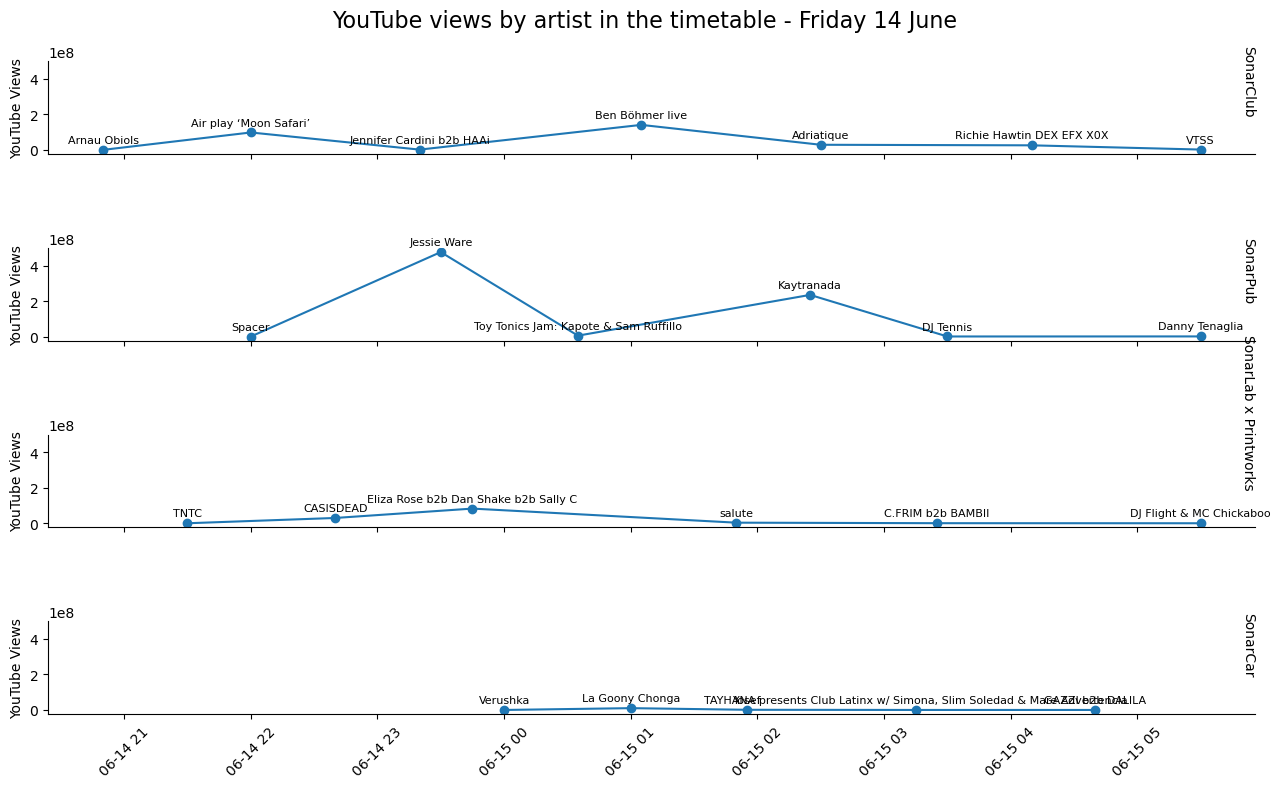

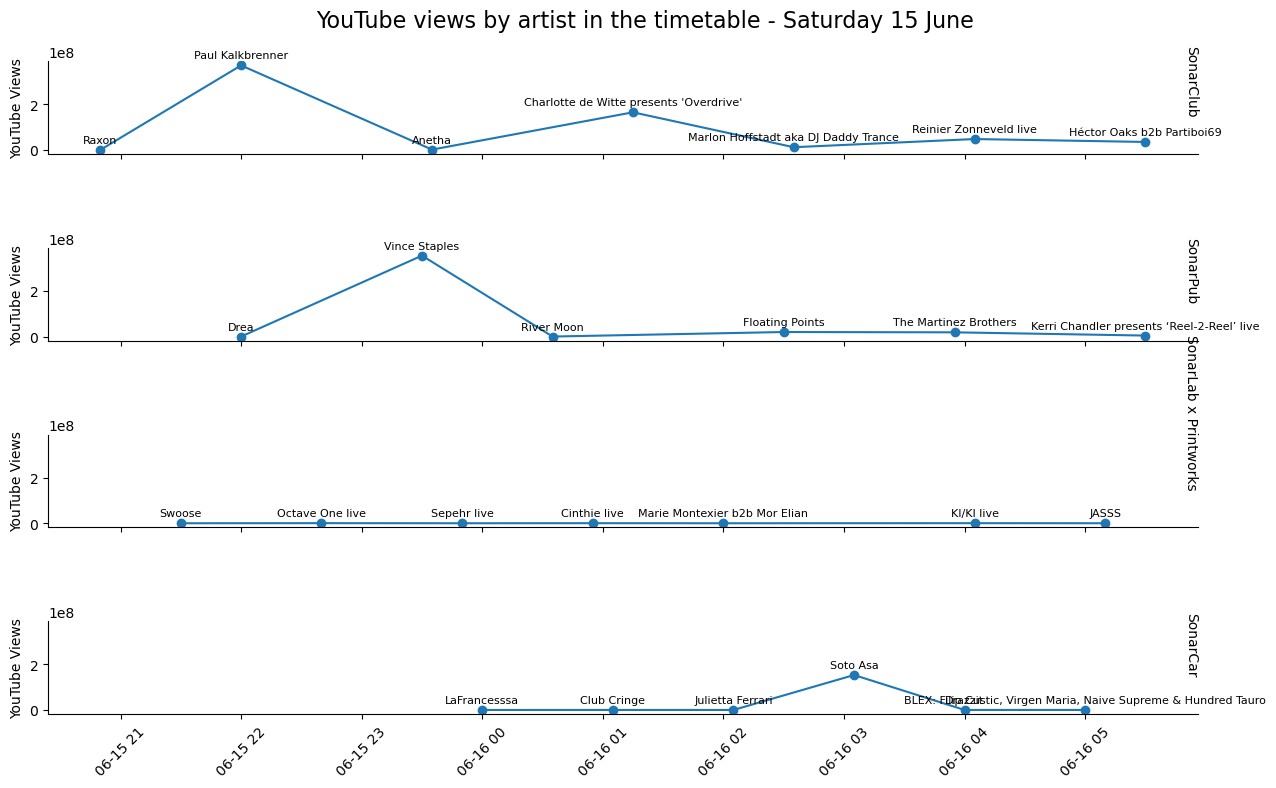

In [ ]:
# Extract the information for Sónar by Night
sonar_timetables_night = sonar_timetables[sonar_timetables['sonar_type'] == 'Sónar by Night'].copy()

# Convert the column into a categorical column with the specified order
sonar_timetables_night['stage'] = pd.Categorical(sonar_timetables_night['stage'],
                                                 categories=['SonarClub', 'SonarPub', 'SonarLab x Printworks', 'SonarCar'],
                                                 ordered=True)


# Get unique day_labels
nights = sonar_timetables_night['day_label'].unique()

# Create a separate figure for each day_label
for night in nights:
    night_df = sonar_timetables_night[sonar_timetables_night['day_label'] == night]
    
    # Get unique stages
    unique_stages = night_df['stage'].unique()
    
    # Create a figure with subplots for each stage
    fig, axes = plt.subplots(len(unique_stages), 1, figsize=(13, 2 * len(unique_stages)), sharex=True, sharey=True)
    
    # Ensure axes is always iterable
    if len(unique_stages) == 1:
        axes = [axes]

    # Plot each stage separately
    for ax, stage in zip(axes, unique_stages):
        stage_df = night_df[night_df['stage'] == stage]
        
        x = stage_df['start_datetime']
        y = stage_df['views_youtube']

        ax.plot(x, y, marker='o')
        ax.set_title(f'{stage}', loc='right', rotation=270, y=0.35, fontsize=10)
        ax.set_ylabel('YouTube Views')
        ax.tick_params(axis='x', rotation=45)

        # Hide the right and top spines
        ax.spines[['right', 'top']].set_visible(False)

        # Annotate the title at each point
        for i, txt in enumerate(stage_df['title']):
            ax.annotate(txt, (x.iloc[i], y.iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

    # Set the main title
    fig.suptitle(f'YouTube views by artist in the timetable - {night}', fontsize=16)
    plt.tight_layout()

plt.show()

## Writing the tables

I check the resulting columns and wrote the processed file:

In [12]:
sonar_timetables.dtypes

sonar_type                object
day_label                 object
start_datetime    datetime64[ns]
end_datetime      datetime64[ns]
title                     object
activity                  object
stage                     object
music_type                object
genre                     object
views_youtube            float64
genre_grouped             object
dtype: object

In [ ]:
# Final version of the processed timetables with the modified and adjusted information

sonar_timetables.to_csv(os.path.join(PROCESSED_PATH, 'sonar_timetables_preprocessed.csv'),
                         index = None, header=True, sep =',', encoding = 'utf-8')
sonar_timetables

,sonar_type,day_label,start_datetime,end_datetime,title,activity,stage,music_type,genre,views_youtube,genre_grouped
0,Sónar by Day,Thursday 13 June,2024-06-13 15:00:00,2024-06-13 16:00:00,Rumbler,Music,SonarVillage,DJ,NaN,NaN,NaN
1,Sónar by Day,Thursday 13 June,2024-06-13 16:05:00,2024-06-13 16:50:00,Huda,Music,SonarVillage,LIVE,NaN,NaN,NaN
2,Sónar by Day,Thursday 13 June,2024-06-13 17:00:00,2024-06-13 18:10:00,Olof Dreijer & Diva Cruz (DJ + Percussion set),Music,SonarVillage,LIVE,NaN,NaN,NaN
3,Sónar by Day,Thursday 13 June,2024-06-13 18:20:00,2024-06-13 19:00:00,Toya Delazy,Music,SonarVillage,LIVE,NaN,NaN,NaN
4,Sónar by Day,Thursday 13 June,2024-06-13 19:05:00,2024-06-13 20:30:00,Surusinghe,Music,SonarVillage,DJ,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
141,Sónar by Night,Friday 15 June,2024-06-16 01:05:00,2024-06-16 01:55:00,Club Cringe,Music,SonarCar,DJ,Experimental,55831.0,electronic_hypnotic
142,Sónar by Night,Friday 15 June,2024-06-16 02:05:00,2024-06-16 02:55:00,Julietta Ferrari,Music,SonarCar,DJ,Experimental,0.0,electronic_hypnotic
143,Sónar by Night,Friday 15 June,2024-06-16 03:05:00,2024-06-16 03:55:00,Soto Asa,Music,SonarCar,LIVE,Reggaeton,153053094.0,other_genres
144,Sónar by Night,Friday 15 June,2024-06-16 04:00:00,2024-06-16 04:50:00,Drazzit,Music,SonarCar,DJ,Trance/Techno,22948.0,electronic_hypnotic
